In [114]:
import numpy as np 
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import tensorflow_datasets as tfds
from sklearn.metrics import f1_score

from sklearn.metrics import accuracy_score

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [128]:
data= tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

As the dimension of each image is 28x28, we changed the entire database to the format [-1 (all elements), height * width]

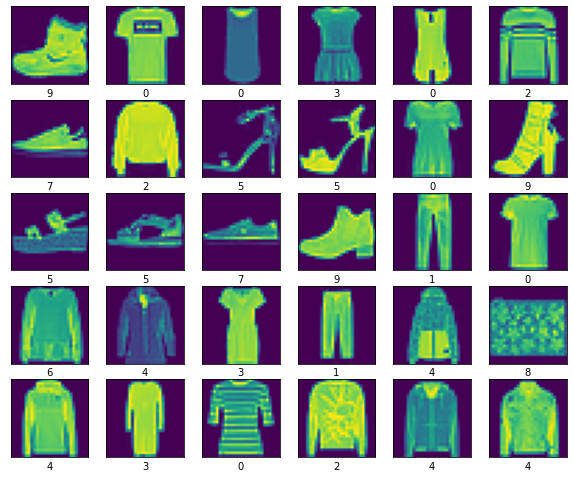

In [127]:
plt.figure(figsize = (10,10))

for i in range(30):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

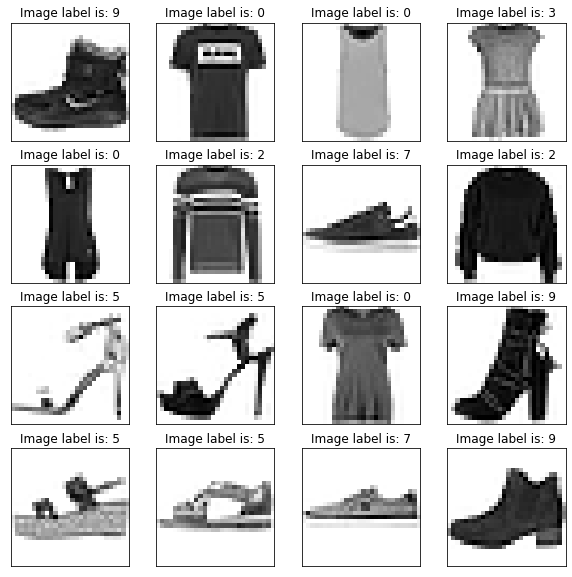

In [117]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

The classes are:

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

The labels are an array of integers, ranging from 0 to 9.

In [118]:
print(y_train)
print("y_train shape is", y_train.shape)

[9 0 0 ... 3 0 5]
y_train shape is (60000,)


In [119]:
print(X_train)
print("X_train shape is", X_train.shape)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
X_train shape is (60000, 28, 28)


In [129]:
x_train = x_train.reshape(-1, 28*28, 1)
x_test=x_test.reshape(-1, 28*28, 1)
print("x_test shape is", x_test.shape)
print("x_train shape is", x_train.shape)

x_test shape is (10000, 784, 1)
x_train shape is (60000, 784, 1)


# models

In [75]:
lr = LogisticRegression(max_iter=100000)
lr.fit(x_pca_reduced, y_train)

NameError: name 'x_pca_reduced' is not defined

In [76]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=100000)

In [77]:
from sklearn.decomposition import PCA
x_pca_reduced_test = PCA(n_components=2, random_state=42).fit_transform(x_test)

In [84]:
accuracy_score(y_test, lr.predict(x_pca_reduced_test))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [80]:
# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hypeparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(x_train, y_train)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [81]:
# Predicting some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(x_train[0].reshape(1, -1))

In [88]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = log_clf.predict(x_train)

In [94]:
log_accuracy = accuracy_score(y_train, y_train_predict)
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.8632833333333333
Logistic F1 Score:  0.8623903566752308


Next I'll try DecisionTreeClassifier

In [121]:
dec_tree_clf = DecisionTreeClassifier(max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
dec_tree_clf.fit(x_train, y_train)

# Predicting some instance from the dataset using the above trained model
y_train_predict = dec_tree_clf.predict(x_train[0].reshape(1, -1))

In [122]:
# Predicting all instances of training dataset X_train using the above trained model
y_train_predict = dec_tree_clf.predict(x_train)

In [123]:
dec_tree_accuracy = accuracy_score(y_train, y_train_predict)

dec_tree_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Decision Tree Accuracy: ", dec_tree_accuracy)

print("Decision Tree F1 Score: ", dec_tree_f1_score)

Decision Tree Accuracy:  1.0
Decision Tree F1 Score:  1.0


In [ ]:
Next I'll try RandomForestClassifier

In [110]:
rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

In [111]:
# Predict some instance from the data set using the above trained model
y_train_predict = rnd_clf.predict(x_train[0].reshape(1, -1))

In [112]:
# Predicting all instances of training dataset X_train using the above trained model
y_train_predict = rnd_clf.predict(x_train)

In [113]:
rnd_accuracy = accuracy_score(y_train, y_train_predict)

rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)

print("Random Forest F1 Score: ", rnd_f1_score)

Random Forest Accuracy:  0.9999833333333333
Random Forest F1 Score:  0.9999833333332176


In [ ]:
Next I'll try Ensemble with soft voting

In [ ]:
from sklearn.ensemble import VotingClassifier

log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

voting_clf.fit(X_train_scaled, y_train)

In [ ]:
# Predicting some instance from the data set using the above trained model
y_train_predict = voting_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
    # Predicting all instances of training dataset X_train_scaled using the above trained model
y_train_predict = voting_clf.predict(X_train_scaled)

In [100]:
voting_accuracy = accuracy_score(y_train, y_train_predict)

voting_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Ensemble Accuracy: ", voting_accuracy)

print("Ensemble F1 Score: ", voting_f1_score)

Ensemble Accuracy:  1.0
Ensemble F1 Score:  1.0


In [ ]:
Next I'll try XGBClassifier

In [ ]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=10, random_state=42)
# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training data set here
# For max_depth parameter, typical values are between 3 to 10. We have chosen 10
xgb_clf.fit(X_train, y_train)

In [ ]:
# Predicting some instance from the data set using the above trained model
y_train_predict = xgb_clf.predict(X_train[0].reshape(1, -1))

In [ ]:
# Predicting all instances of training dataset X_train using the above trained model
y_train_predict = xgb_clf.predict(X_train)

In [99]:
xgb_accuracy = accuracy_score(y_train, y_train_predict)

xgb_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("XGBoost Accuracy: ", xgb_accuracy)

print("XGBoost F1 Score: ", xgb_f1_score)

XGBoost Accuracy:  1.0
XGBoost F1 Score:  1.0


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])
clf.fit(x_train, y_train)
l_pred = clf.predict(x_test)
confusion_matrix(y_test, l_pred)
print(classification_report(y_test, l_pred))

AttributeError: 'numpy.ndarray' object has no attribute 'lower'